# Running an EMD and frequency transform

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from PyEMD import EMD
from PyEMD.checks import whitenoise_check
import xarray as xr
import matplotlib.dates as mdates

In [52]:
adcp = xr.open_dataset('/Users/xedhjo/Documents/Projects/SO-CHIC/data/DCPS.nc')

In [53]:
adcp = adcp.sel(time=slice('2022-05-03 12:00','2022-05-23 14:43:48'))
adcp = adcp.sel(cells=slice(0,10)).mean('cells')
adcp = adcp.resample(time='1h').mean('time')
adcp = adcp.where(np.isfinite(adcp['c_u_corr']),drop=True)
adcp = adcp.resample(time='1h').mean('time')

adcp['mday'] = ('time'), mdates.date2num(adcp['time']) - mdates.date2num(adcp['time'].values[0])

## Define the signal

In [128]:
u = adcp['c_u_corr'].values[:-20]
v = adcp['c_v_corr'].values[:-20]
t = adcp['mday'].values[:-20]

## Execute EMD on zonal velocity

In [129]:
IMF = EMD().emd(u,t)
N = IMF.shape[0]+1

## Plot results

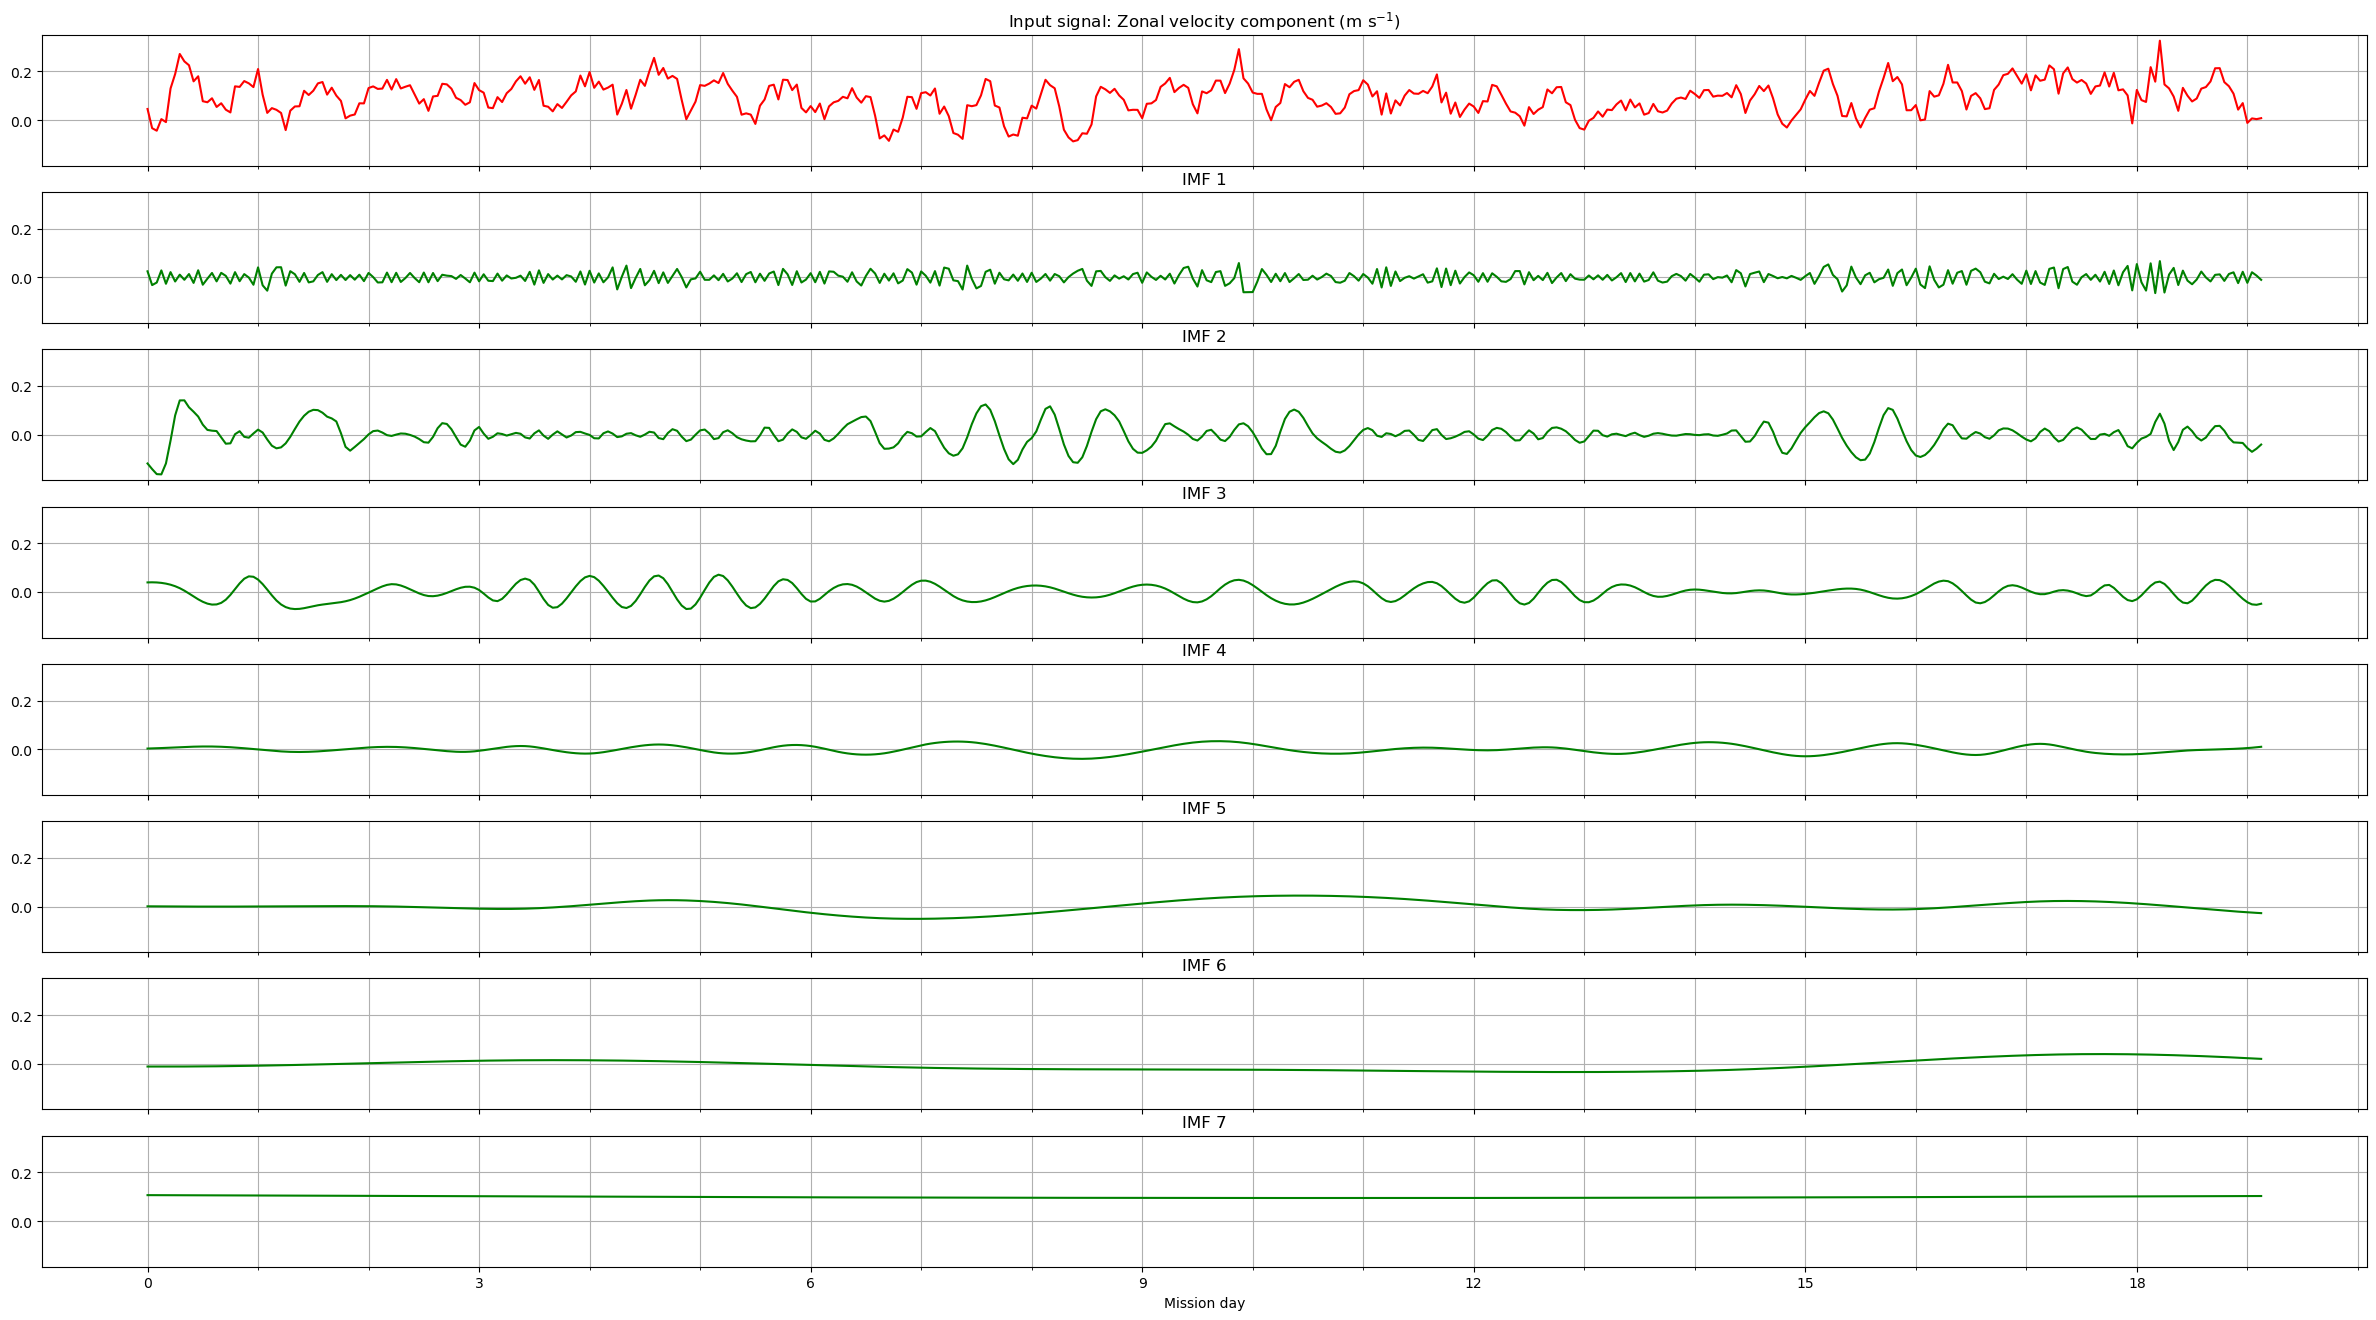

In [130]:
fig, ax = plt.subplots(N,1,figsize=(30,N*2),sharex=True,sharey=True)

ax[0].plot(t, u, 'r')
ax[0].set(title = "Input signal: Zonal velocity component (m s$^{-1}$)")

for n, imf in enumerate(IMF):
    ax[n+1].plot(t, imf, 'g')
    ax[n+1].set(title = "IMF "+str(n+1))
    ax[n].grid(True, which='both', axis='both')

ax[-1].set(xlabel = "Mission day")
ax[-1].set_xticks(np.arange(0,21,3))  # Major ticks
ax[-1].set_xticks(np.arange(0,21,1), minor=True)  # Minor ticks

# Set grid and tick parameters
ax[-1].grid(True, which='both', axis='both')
ax[-1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)


In [132]:
significant_imfs = whitenoise_check(IMF, test_name='apriori')
print(significant_imfs)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0}


In [57]:
IMF = EMD().emd(v,t)
N = IMF.shape[0]+1

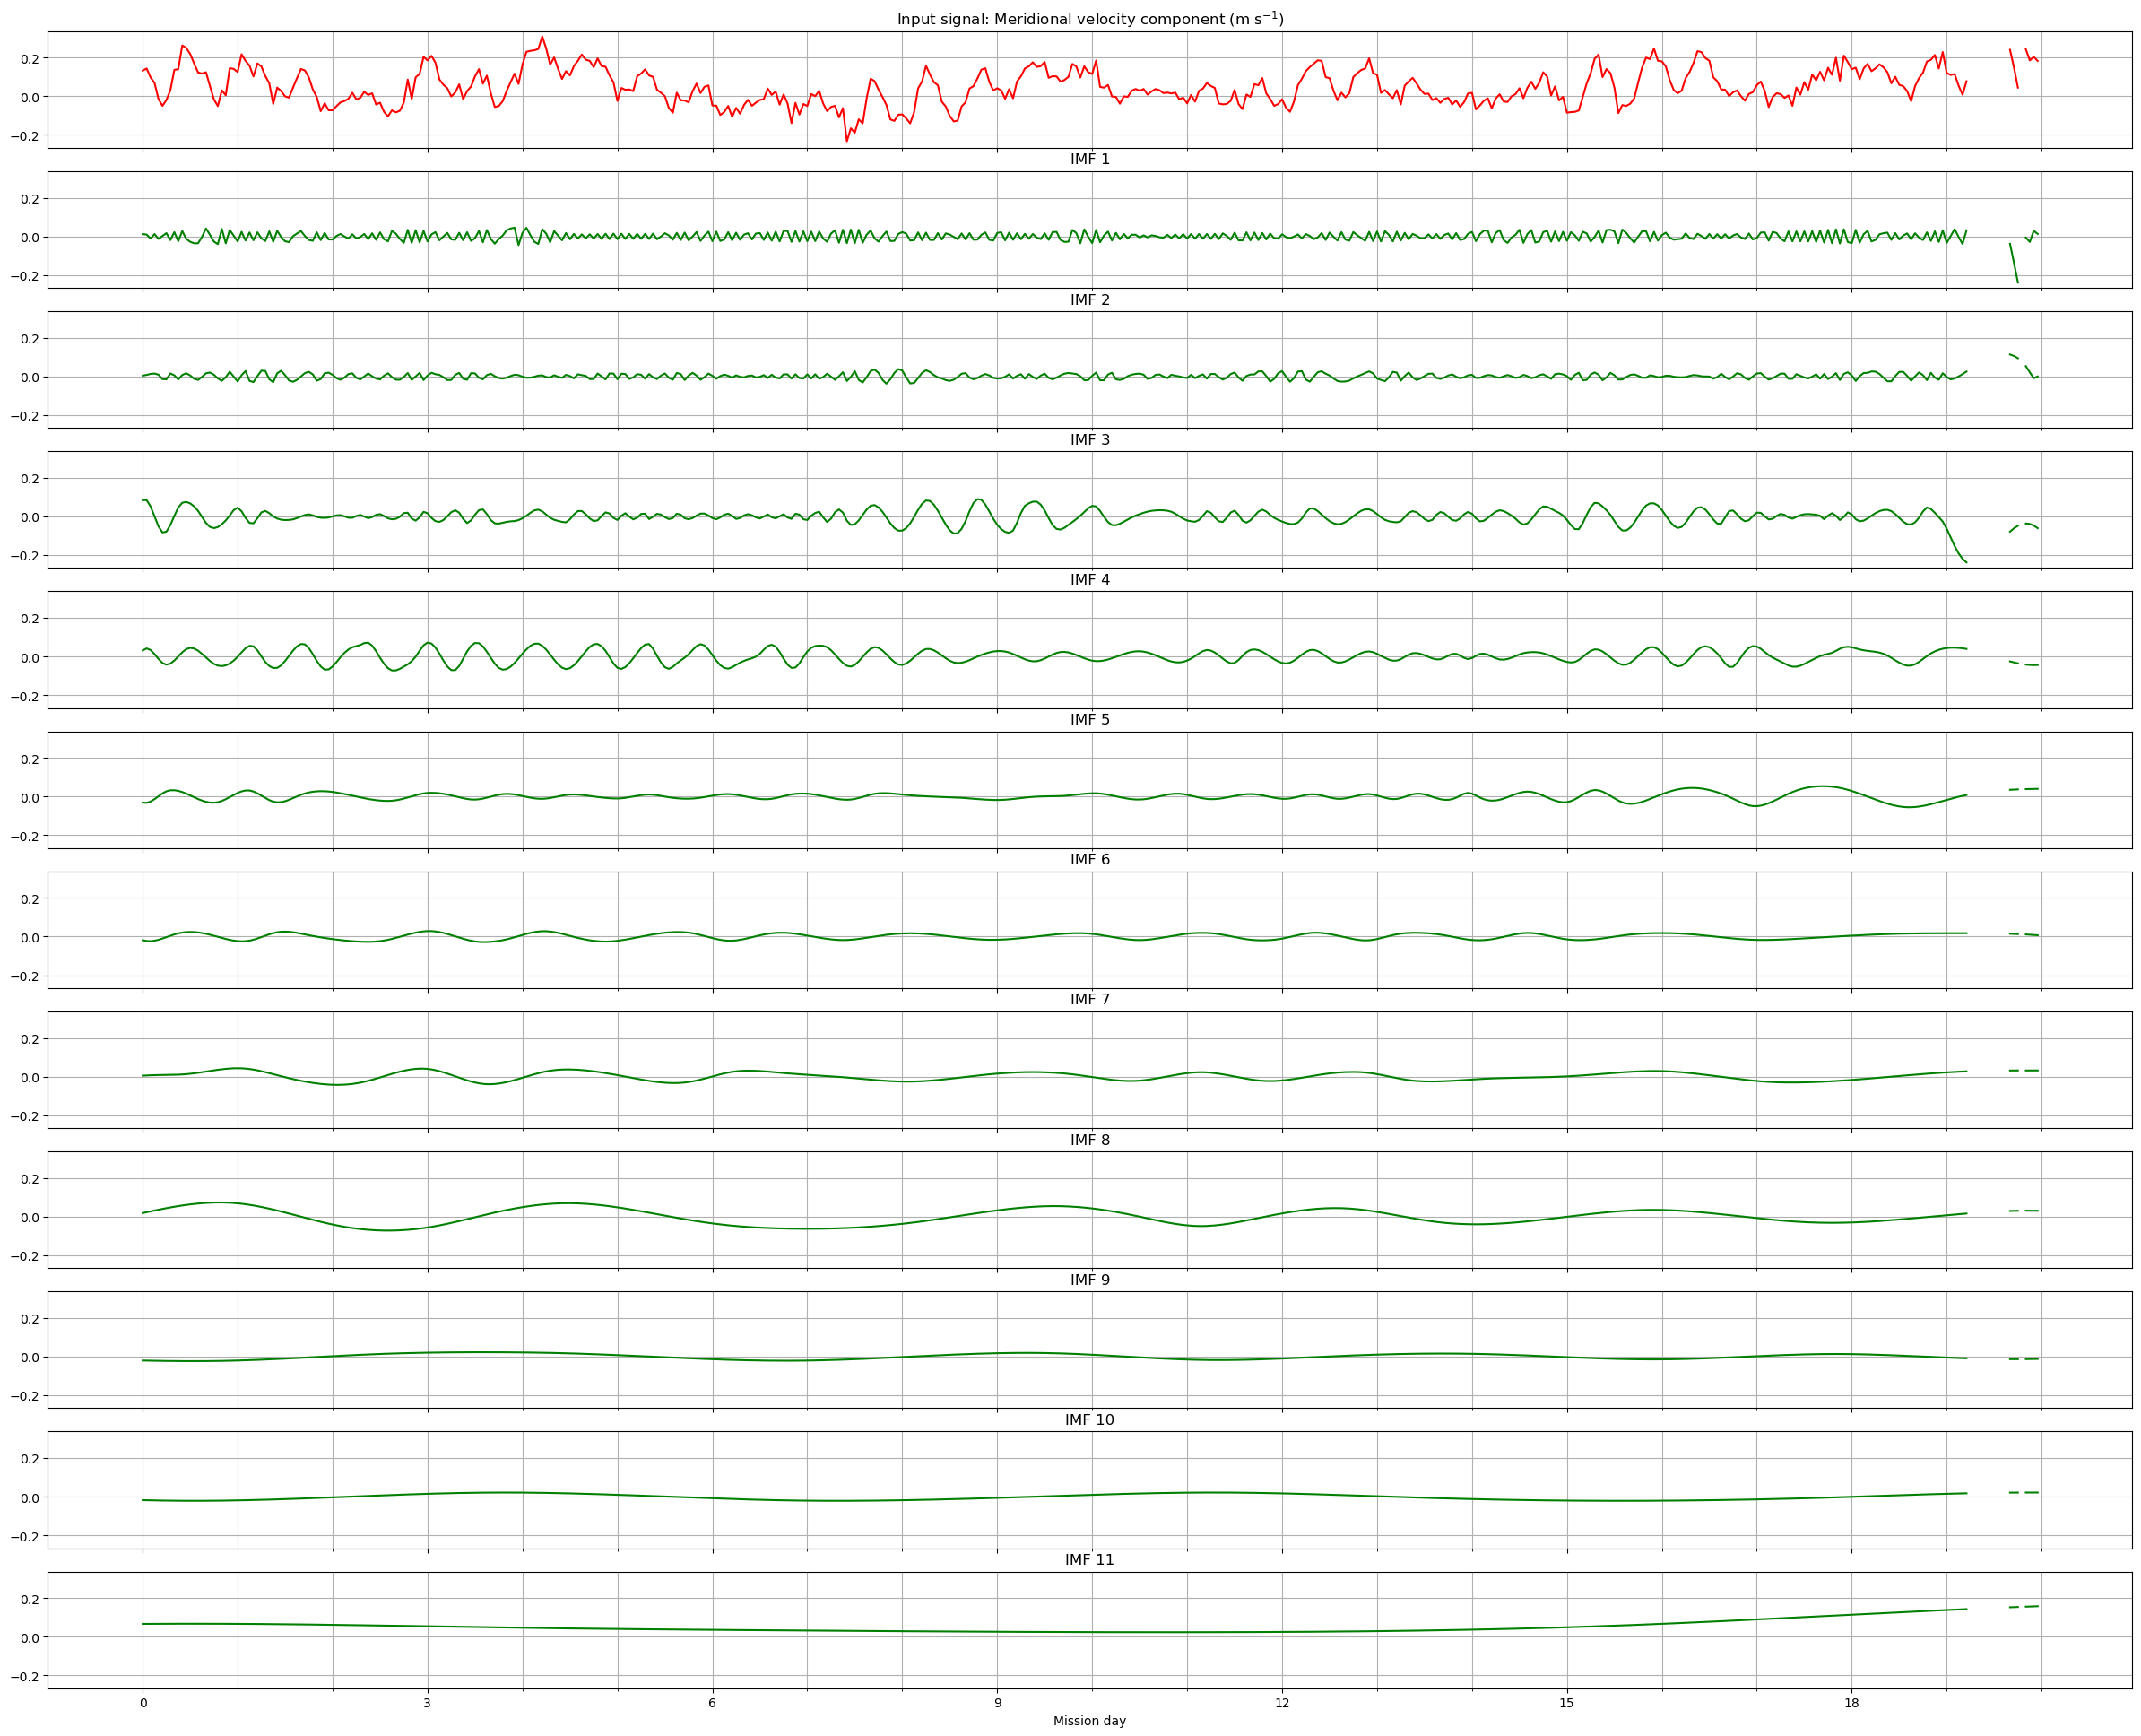

In [67]:
fig, ax = plt.subplots(N,1,figsize=(30,N*2),sharex=True,sharey=True)

ax[0].plot(t, v, 'r')
ax[0].set(title = "Input signal: Meridional velocity component (m s$^{-1}$)")

for n, imf in enumerate(IMF):
    ax[n+1].plot(t, imf, 'g')
    ax[n+1].set(title = "IMF "+str(n+1))
    ax[n].grid(True, which='both', axis='both')

ax[-1].set(xlabel = "Mission day")

ax[-1].set_xticks(np.arange(0,21,3))  # Major ticks
ax[-1].set_xticks(np.arange(0,21,1), minor=True)  # Minor ticks

# Set grid and tick parameters
ax[-1].grid(True, which='both', axis='both')
ax[-1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)


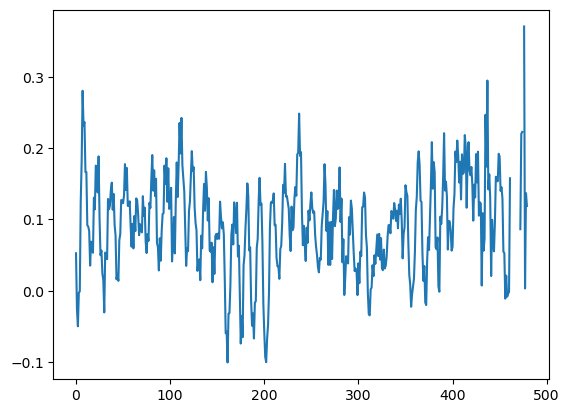

In [92]:
plt.plot(u - IMF[1])

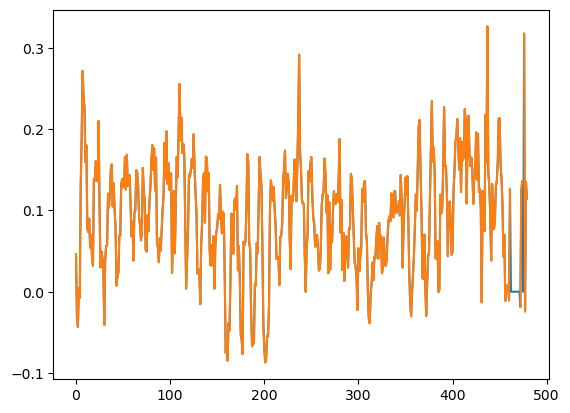

In [100]:
plt.plot(np.nansum(IMF,axis=0))
plt.plot(u)

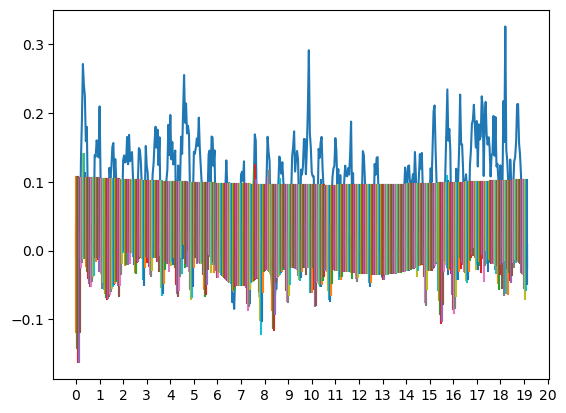

In [140]:
plt.plot(t,u)
plt.plot([t]*7,IMF)
plt.xticks(np.arange(0,21,1))
plt.show()

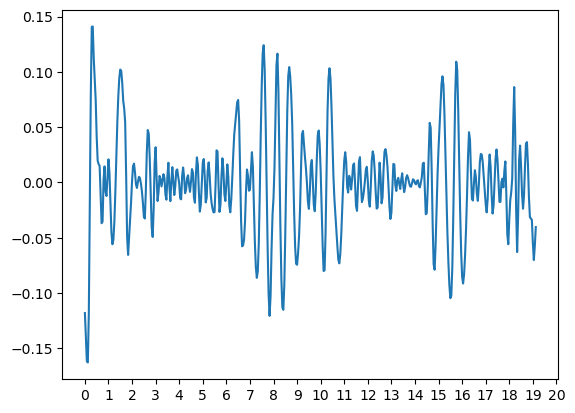

In [159]:
#plt.plot(t,u)
plt.plot(t,IMF[])
plt.xticks(np.arange(0,21,1))
plt.show()

In [160]:
IMF = EMD().emd((u**2 + v**2)**(1/2),t)
N = IMF.shape[0]+1

## Plot results

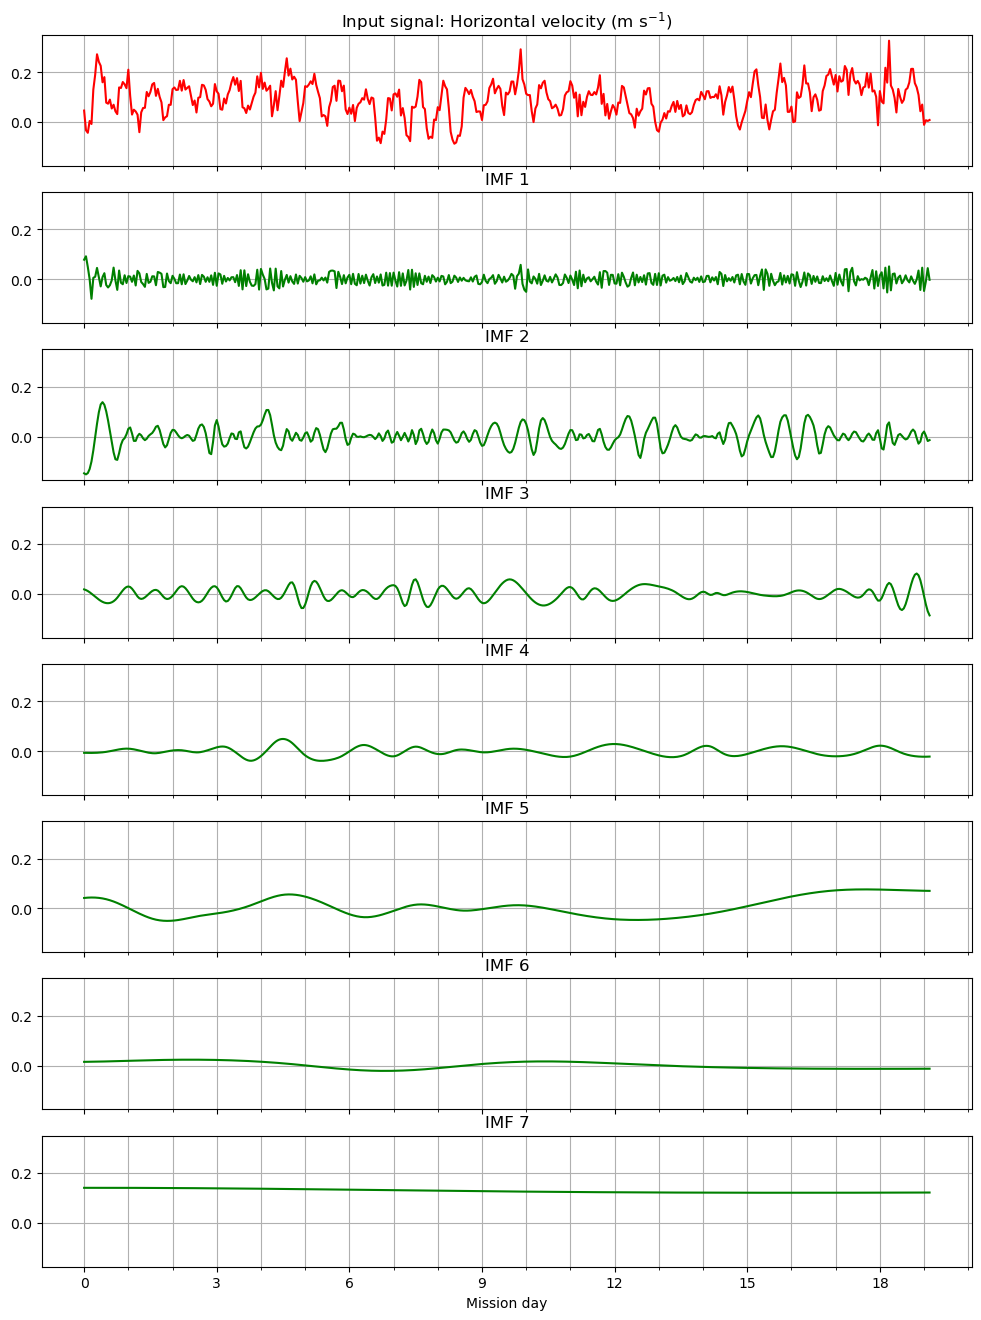

In [164]:
fig, ax = plt.subplots(N,1,figsize=(12,N*2),sharex=True,sharey=True)

ax[0].plot(t, u, 'r')
ax[0].set(title = "Input signal: Horizontal velocity (m s$^{-1}$)")

for n, imf in enumerate(IMF):
    ax[n+1].plot(t, imf, 'g')
    ax[n+1].set(title = "IMF "+str(n+1))
    ax[n].grid(True, which='both', axis='both')

ax[-1].set(xlabel = "Mission day")
ax[-1].set_xticks(np.arange(0,21,3))  # Major ticks
ax[-1].set_xticks(np.arange(0,21,1), minor=True)  # Minor ticks

# Set grid and tick parameters
ax[-1].grid(True, which='both', axis='both')
ax[-1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)


In [132]:
significant_imfs = whitenoise_check(IMF, test_name='apriori')
print(significant_imfs)

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0}
